# Installation

## I don't know what you've installed or how you've installed it, so let's talk before you run any of this.

**OS X folks** can run the following:

* `brew install geos`
* `brew install gdal`
* `brew install spatialindex`
* `pip3 install pillow`
* `pip3 install pysal`
* `pip3 install geopandas`
* `pip3 install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`
* `pip3 install rtree`

For **Windows without Anaconda**, [use this guide](http://geoffboeing.com/2014/09/using-geopandas-windows/) to install through `pip` directly from `whl` files.

# Geopandas Usage

## Importing

You'll be importing

* pandas because you love it
* geopandas for geographic stuff
* `Point` from shapely to help convert CSV files into something geopandas can understand

and `%matplotlib inline` for viewing maps, of course.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## Opening a shapefile

Let's open up the Community Districts data. **What kind of file is it?**

In [2]:
districts = gpd.read_file('Community Districts/districts.shp')

## Introduction to the GeoDataFrame

A GeoDataFrame is *just like a dataframe*, it just... has geographic stuff in it.

In [4]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311.0,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314.0,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313.0,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


In [13]:
districts.crs

{'init': 'epsg:4326'}

## Visualizing a shapefile

You can just use `.plot()` to visualize a GeoDataFrame, it's nice and easy.

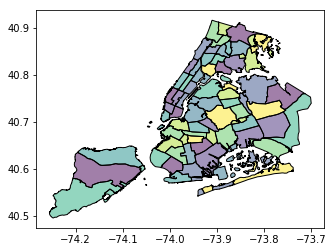

In [5]:
districts.plot()

## Opening a CSV of points

geopandas doesn't understand a CSV file of lat/lon points, so you need to convert each line into shapely geometry, then feed that into a new geo dataframe.

Once you do that, you need to set the `crs` to `{'init': 'epsg:4326'}` so it knows what kind of datum/sphereoid/projection you're measuring from.

**Let's try opening the earthquakes CSV**

In [6]:
def make_point(row):
    return Point(row.longitude, row.latitude)

# Step 1: Read in your file as a dataframe
df = pd.read_csv('earthquakes_1.0_day.csv')
df.head()

In [10]:
# Step 2: Make a list of points using .apply
points = df.apply(make_point, axis=1)
points.head()

0          POINT (-136.8335 59.8048)
1    POINT (-120.2555008 39.3981667)
2           POINT (-136.7109 59.897)
3     POINT (-121.635498 37.2468338)
4    POINT (-122.8081665 38.8301659)
dtype: object

In [12]:
# Step 3: Make a GeoDataFrame by sending geometry=points
earthquakes = gpd.GeoDataFrame(df, geometry=points)
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,...,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,...,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,...,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


In [14]:
# Step 4: Set the CRS using .crs = {'init': 'epsg:4326'}
earthquakes.crs = {'init': 'epsg:4326'}

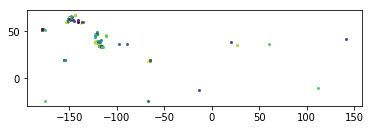

In [15]:
# Step 5: Step back and see 
earthquakes.plot()

## Opening a CSV of points using `lambda`

We used `.apply` and a function up above, but that function only does one thing! Let's learn something new called `lambda`, it's a one-line function we can use with `.apply`.

## Using the built-in map

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

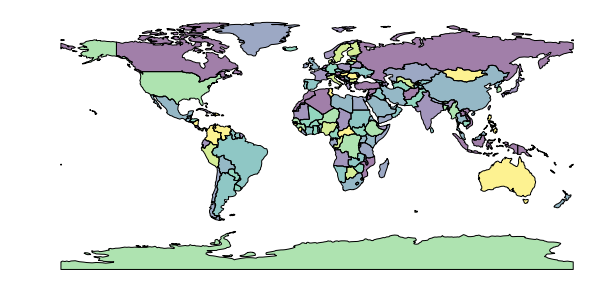

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,5))
ax.axis('off')

# Styling your visuals

## Setting size, line and shape colors, widths, axes

* `linewidth`
* `color`
* `edgecolor`
* `ax.axis`

Let's plot the community districts!

Let's plot the world!

## Setting the projection

You can use `to_crs` to convert to different projections. In typical pandas fashion, you can do it a lot of ways, but the easiest is to send a `epsg=` and feed it the correct EPSG code.

You'll also probably want to do an `ax.axis('off')` to turn off the splines and axes!

What are the EPSG codes for some common projections?

## Styling markers

* markersize
* color
* alpha

# Colormaps/ramps

## Auto colormap

Giving your `plot` a `column` and a `cmap` will colorize your values. You can try `plasma` as your color map, or check out [more here](https://matplotlib.org/examples/color/colormaps_reference.html).

## Auto colormap again

We can also try with the world. What's the `gdp_md_est` column looking like?

## Plotting multiple layers of data

Let's try plotting the earthquakes on top of the world. **Save your first plot as `ax` and send it to the next one as `ax=ax`.**

# Setting the projection by `proj` with named projections

Instead of using an EPSG code, you can also set the projection with `to_crs` by  `.to_crs({'proj': 'merc'})` or something similar.

I don't recommend this method, but it is a little friendlier than EPSG codes.

### Plot the world with the default projection

In [ ]:
ax = world.plot()
ax.set_title("Default")

### Plot the world with Mercator (merc)

### Plot the world with [Transverse Mercator](https://en.wikipedia.org/wiki/Transverse_Mercator_projection) (tmerc)

### Plot the world with Albers Equal Area (aea)

# Spatial join

# Dataset 1: States

Let's import the states and clean them up a little bit. we need to clean the data up a little

In [19]:
# Read in the shapefile from cb_2016_us_state_500k as "states"
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")

In [20]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
states.tail(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
48,0400000US47,106797662267,2355188876,47,00,Tennessee,47,01325873,TN,"POLYGON ((-90.31029799999999 35.004295, -90.30..."
49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX,"(POLYGON ((-94.718296 29.728855, -94.717207 29..."
50,0400000US51,102257320053,8528605825,51,00,Virginia,51,01779803,VA,"(POLYGON ((-75.742406 37.80835, -75.741512 37...."
51,0400000US53,172113416541,12558451099,53,00,Washington,53,01779804,WA,"(POLYGON ((-122.33164 48.020556, -122.328343 4..."
52,0400000US55,140273604537,29361386480,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.95616699999999 45.355489, -86.9..."


## Dataset 2: Waffle House

Read in `wafflehouses.csv`, and convert it to a GeoDataFrame.

In [21]:
df = pd.read_csv('wafflehouses.csv')

In [22]:
df.head()

,location,lat,long,score
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2


In [30]:
points = df.apply(lambda row: Point(row.long, row.lat), axis=1)
wafflehouses = gpd.GeoDataFrame(df, geometry=points)
wafflehouses.crs = {'init': 'epsg:4326'}

In [31]:
wafflehouses.head()

,location,lat,long,score,geometry
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269)
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627)
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078)
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903)
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025)


### Plot the locations, coloring based on the 'score' column.

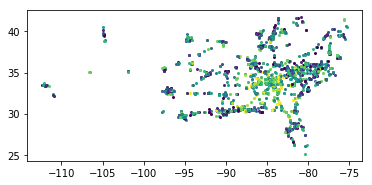

In [32]:
wafflehouses.plot(column='score')

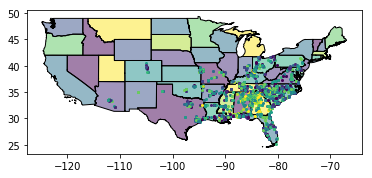

In [33]:
ax = states.plot()
wafflehouses.plot(ax=ax, column='score')

# The actual spatial join

### Is the CRS of the states the same as the CRS of the Waffle House locations?

In [34]:
states.crs

{'init': 'epsg:4269'}

In [35]:
wafflehouses.crs

{'init': 'epsg:4326'}

### If not, we'll force them to match using `.to_crs`

In [36]:
# Convert CRS to match
converted_states = states.to_crs(wafflehouses.crs)
converted_states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


### And now we can join

In [37]:
# http://geopandas.org/mergingdata.html
wafflehouses_with_state_data = gpd.sjoin(wafflehouses, converted_states, how='left', op='within')
wafflehouses_with_state_data.head()

,location,lat,long,score,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269),9,0400000US13,1.491698e+11,4.741101e+09,13,00,Georgia,13,01705317,GA
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903),48,0400000US47,1.067977e+11,2.355189e+09,47,00,Tennessee,47,01325873,TN
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025),49,0400000US48,6.766335e+11,1.902599e+10,48,00,Texas,48,01779801,TX


In [38]:
converted_states.shape

(49, 10)

In [39]:
wafflehouses.shape

(1803, 5)

In [40]:
wafflehouses_with_state_data.shape

(1803, 15)

## Doing things with spatially joined data

* What column do we use for color?
* Add a legend with `legend=True`
* Something is going to go wrong, though!

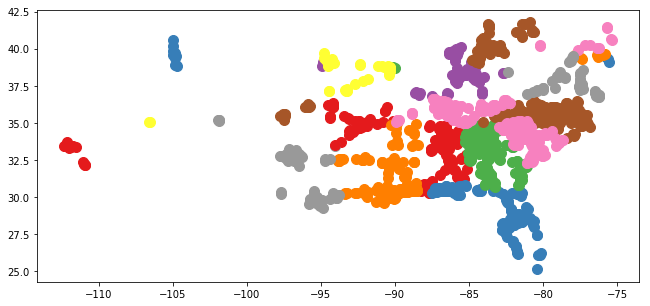

In [48]:
wafflehouses_with_state_data.dropna().plot(column='NAME', linewidth=1, markersize=10, figsize=(20,5))

## What if we reverse the spatial join and make it 'contains'?

How is this different than what we did before?

In [49]:
# http://geopandas.org/mergingdata.html
states_with_wafflehouse_data = gpd.sjoin(converted_states, wafflehouses, how='left', op='contains')
states_with_wafflehouse_data.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,location,lat,long,score
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",149,"Waffle House-Tuscaloosa,AL",33.127149,-87.549124,5.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",33,"Waffle House-Calera,AL",33.147916,-86.749224,6.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",148,"Waffle House-Tuscaloosa,AL",33.165991,-87.551787,7.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147,"Waffle House-Tuscaloosa,AL",33.176447,-87.470757,10.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",146,"Waffle House-Tuscaloosa,AL",33.177825,-87.524648,8.0


In [50]:
states_with_wafflehouse_data.shape

(1826, 15)

In [51]:
select_columns = states_with_wafflehouse_data[['NAME', 'geometry', 'score']]
select_columns.head()

,NAME,geometry,score
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",5.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",6.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",10.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",8.0


## Aggregating with `.dissolve` (the geographic version of 'groupby')

http://geopandas.org/aggregation_with_dissolve.html

### In theory we'd run the following line

But it doesn't work because we have too much data, and `.dissolve` isn't smart enough to deal with it.

In [ ]:
# We can't do this, I think because there are too many wafflehouses
#wafflehouse_counts = states_with_wafflehouse_data.dissolve(by='NAME', aggfunc='count')
#wafflehouse_counts.head()

### But we can try it out with the first 5/20/50 of them

In [ ]:
%%time
select_columns.head(5).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(20).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(50).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(200).dissolve(by='NAME', aggfunc='count')

## Spatial joins for LARGE data sets (NOT using dissolve)

Instead of using `.dissolve`, we need to use `.contains` to say "find me all of the waffle houses inside of this one specific state". I don't know why this works better, but it does. We'll use `.sum()` to count the number inside, but you could also do something like `['score'].mean()` etc.

### First, let's try it with one state

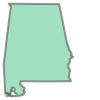

In [58]:
states.loc[0].geometry

In [62]:
state = states.loc[0]
wafflehouses.within(state.geometry).sum()

147

### Now, let's try it with every state

In [63]:
# You can use .contains
# counts the true ones
states['wafflehouse_count'] = states.apply(lambda state: wafflehouses.within(state.geometry).sum(), axis=1)
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,wafflehouse_count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",17
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",45
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",0
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",10


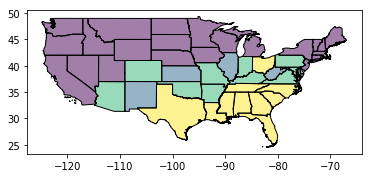

In [65]:
states.plot(column='wafflehouse_count', scheme='quantiles')

In [ ]:
states.plot(column='wafflehouse_count', scheme='equal_interval')

In [ ]:
states.plot(column='wafflehouse_count', scheme='fisher_jenks')

## Spatial joins for SMALLER data sets (YES using dissolve)

If our dataset isn't that big, though, we're fine to use `.dissolve`.

In [ ]:
# Each one is a country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(10)

See how every country has a continent? We can `.dissolve` to group them together based on continent. It's like groupby, really!

In [ ]:
# But we'll dissolve them so it's only continents
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

# Saving the results

You want to look at this stuff in Leaflet, right? For that we'll need to save. Geopandas supports practically _every_ file format you could ever want.

In [66]:
wafflehouses_with_state_data.to_file("wafflehouses.json", driver='GeoJSON')